In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')
#"C:/Users/Asus/Documents/Projects/Python/heart.csv"
#"C:/Users/Asus/Documents/Projects/Python/framingham.csv

# Data Collection nd Processing

In [2]:
#Loading the csv data to a Pandas Data frame
heart_data = pd.read_csv("C:/Users/Asus/Documents/Projects/Python/framingham.csv")

In [3]:
#print first 5 row sof dataset
heart_data.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [4]:
heart_data.tail()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0
4237,0,52,2.0,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0,0


In [5]:
#number of rows and cols
heart_data.shape

(4238, 16)

In [6]:
#getting some info  about data
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [7]:
#checcking for missing values
heart_data.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [8]:
heart_data.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [9]:
heart_data.drop(['education'],axis=1, inplace = True)

In [10]:
heart_data.head()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [11]:
heart_data['cigsPerDay'].fillna(int(heart_data['cigsPerDay'].mean()), inplace=True)


In [12]:
heart_data['BPMeds'].fillna(int(heart_data['BPMeds'].mean()), inplace=True)

In [13]:
heart_data['totChol'].fillna(int(heart_data['totChol'].mean()), inplace=True)

In [14]:
heart_data['BMI'].fillna(int(heart_data['BMI'].mean()), inplace=True)

In [15]:
heart_data['heartRate'].fillna(int(heart_data['heartRate'].mean()), inplace=True)

In [16]:
heart_data['glucose'].fillna(int(heart_data['glucose'].mean()), inplace=True)

In [17]:
heart_data.isnull().sum()

male               0
age                0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [18]:
#statistical measures
heart_data.describe()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000
mean,0.429212,49.584946,0.494101,9.003067,0.029259,0.005899,0.310524,0.025720,236.713072,132.352407,82.893464,25.798412,75.878716,81.878244,0.151958
std,0.495022,8.572160,0.500024,11.879230,0.168552,0.076587,0.462763,0.158316,44.326521,22.038097,11.910850,4.071305,12.025185,22.838305,0.359023
min,0.000000,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.080000,68.000000,72.000000,0.000000
50%,0.000000,49.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.380000,75.000000,80.000000,0.000000
75%,1.000000,56.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,262.000000,144.000000,89.875000,28.037500,83.000000,85.000000,0.000000
max,1.000000,70.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [19]:
heart_data.rename(columns={"TenYearCHD":"output"}, inplace = "True")

In [20]:
heart_data.head(2)

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,output
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0


In [21]:
#checking the distribution of target variable
heart_data['output'].value_counts()

0    3594
1     644
Name: output, dtype: int64

# EDA

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
sex_counts = heart_data['male'].value_counts()

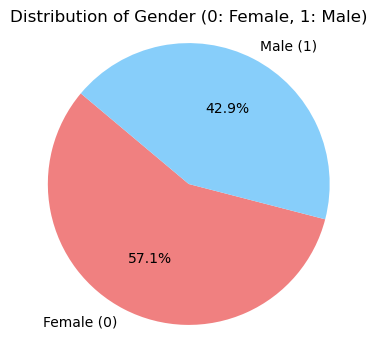

In [24]:
# Define labels and colors
labels = ['Female (0)', 'Male (1)']
colors = ['lightcoral', 'lightskyblue']

# Create a pie chart
plt.figure(figsize=(4, 4))
plt.pie(sex_counts, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Gender (0: Female, 1: Male)')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Display the pie chart
plt.show()

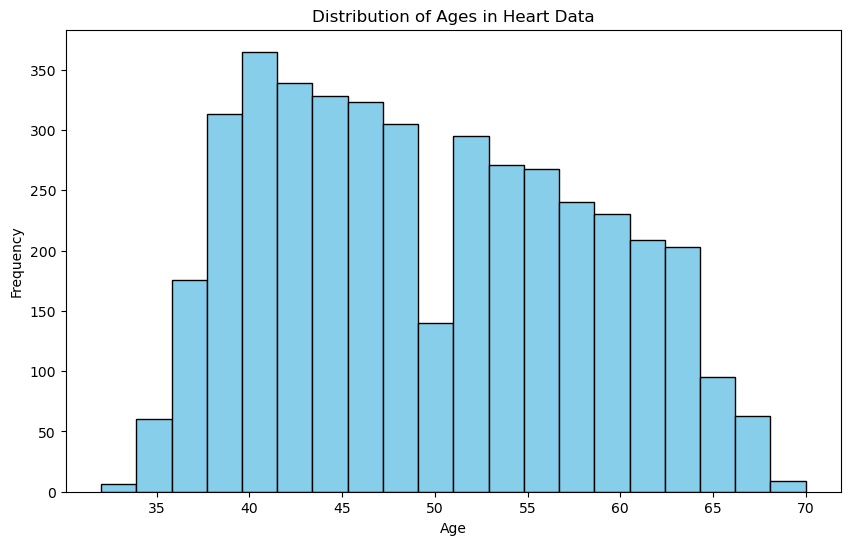

In [25]:
ages = heart_data['age']

# Create a histogram (bar graph)
plt.figure(figsize=(10, 6))
plt.hist(ages, bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Ages in Heart Data')
plt.xlabel('Age')
plt.ylabel('Frequency')


# Display the bar graph
plt.show()

In [26]:
output_counts = heart_data['output'].value_counts()


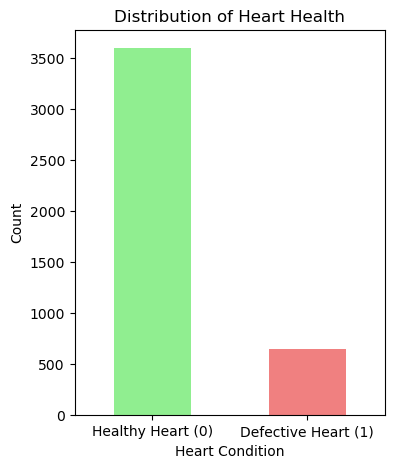

In [27]:
# Define labels and colors
labels = ['Healthy Heart (0)', 'Defective Heart (1)']
colors = ['lightgreen', 'lightcoral']

# Create a bar graph
plt.figure(figsize=(4, 5))
output_counts.plot(kind='bar', color=colors)
plt.title('Distribution of Heart Health')
plt.xlabel('Heart Condition')
plt.ylabel('Count')

# Customize the x-axis tick labels
plt.xticks(range(len(labels)), labels, rotation=0)

# Display the bar graph
plt.show()


In [28]:
heart_data.head(1)

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,output
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0


1 represents defective heart and 
0 represents healthy heart

# Splitting the features and target

In [29]:
X = heart_data.drop(columns = 'output', axis=1)
Y = heart_data['output']

In [30]:
print(X)

      male  age  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0        1   39              0         0.0     0.0                0   
1        0   46              0         0.0     0.0                0   
2        1   48              1        20.0     0.0                0   
3        0   61              1        30.0     0.0                0   
4        0   46              1        23.0     0.0                0   
...    ...  ...            ...         ...     ...              ...   
4233     1   50              1         1.0     0.0                0   
4234     1   51              1        43.0     0.0                0   
4235     0   48              1        20.0     0.0                0   
4236     0   44              1        15.0     0.0                0   
4237     0   52              0         0.0     0.0                0   

      prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  
0                0         0    195.0  106.0   70.0  26.97       8

In [31]:
print(Y)

0       0
1       0
2       0
3       1
4       0
       ..
4233    1
4234    0
4235    0
4236    0
4237    0
Name: output, Length: 4238, dtype: int64


Splitting data into trainning data and test data

In [32]:
X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size = 0.2, stratify = Y, random_state = 2)

In [33]:
print(X.shape, X_train.shape, X_test.shape)

(4238, 14) (3390, 14) (848, 14)


# Model Training - Logistic Regression

In [34]:
model = LogisticRegression()

In [35]:
#training the logistic regression model with training data
model.fit(X_train, Y_train)

LogisticRegression()

# Model Evaluation - (Accuracy Score)

In [36]:
#accuracy score on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [37]:
print('Accuracy score on Training data: ', training_data_accuracy*100)

Accuracy score on Training data:  85.10324483775811


In [38]:
#accuracy score on test data

X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)


In [39]:
print('Accuracy score on Test data: ', test_data_accuracy*100)

Accuracy score on Test data:  85.14150943396226


# Building a predictive system

In [40]:
heart_data.head(1)

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,output
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0


In [41]:
input_data = (1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0)

#change input data to a numpy array

input_data_as_numpy_array = np.asarray(input_data)

#reshaping the numpy array as we are predicting for only instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if(prediction[0]==0):
    print("the person does not have heart disease.")
else:
    print("The person has Heart Disease. ")

[0]
the person does not have heart disease.


# Model Training - SVM

In [42]:
from sklearn import svm

In [43]:
svm = svm.SVC()

In [44]:
svm.fit(X_train,Y_train)

SVC()

In [45]:
#accuracy score on training data
X_train_prediction_svm = svm.predict(X_train)
training_data_accuracy_svm = accuracy_score(X_train_prediction_svm, Y_train)

In [46]:
print('Accuracy score on Training data by svm: ', training_data_accuracy_svm*100)

Accuracy score on Training data by svm:  84.86725663716814


In [47]:
#accuracy score on test data

X_test_prediction_svm = svm.predict(X_test)
test_data_accuracy_svm = accuracy_score(X_test_prediction_svm, Y_test)


In [48]:
print('Accuracy score on Test data: ', test_data_accuracy_svm*100)

Accuracy score on Test data:  84.7877358490566


# Model Training - KNN

In [49]:
from sklearn.neighbors import KNeighborsClassifier

In [50]:
knn = KNeighborsClassifier()

In [51]:
knn.fit(X_train,Y_train)

KNeighborsClassifier()

In [52]:
#accuracy score on training data
X_train_prediction_knn = knn.predict(X_train)
training_data_accuracy_knn = accuracy_score(X_train_prediction_knn, Y_train)

In [53]:
print('Accuracy score on Training data by knn: ', training_data_accuracy_knn*100)

Accuracy score on Training data by knn:  86.57817109144543


In [54]:
#accuracy score on test data

X_test_prediction_knn = knn.predict(X_test)
test_data_accuracy_knn = accuracy_score(X_test_prediction_knn, Y_test)

In [55]:
print('Accuracy score on Test data by knn: ', test_data_accuracy_knn*100)

Accuracy score on Test data by knn:  83.84433962264151


# Model Training - DECISION TREE

In [56]:
from sklearn.tree import DecisionTreeClassifier 

In [57]:
dt = DecisionTreeClassifier()

In [58]:
dt.fit(X_train,Y_train)

DecisionTreeClassifier()

In [59]:
#accuracy score on training data
X_train_prediction_dt = dt.predict(X_train)
training_data_accuracy_dt = accuracy_score(X_train_prediction_dt, Y_train)

In [60]:
print('Accuracy score on Training data by dt: ', training_data_accuracy_dt*100)

Accuracy score on Training data by dt:  100.0


In [61]:
#accuracy score on test data

X_test_prediction_dt = dt.predict(X_test)
test_data_accuracy_dt = accuracy_score(X_test_prediction_dt, Y_test)

In [62]:
print('Accuracy score on Test data by dt: ', test_data_accuracy_dt*100)

Accuracy score on Test data by dt:  74.88207547169812


In [63]:
#Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier

In [64]:
rf = RandomForestClassifier()

In [65]:
rf.fit(X_train,Y_train)

RandomForestClassifier()

In [66]:
#accuracy score on training data
X_train_prediction_rf = rf.predict(X_train)
training_data_accuracy_rf = accuracy_score(X_train_prediction_rf, Y_train)

In [67]:
print('Accuracy score on Training data by rf: ', training_data_accuracy_rf*100)

Accuracy score on Training data by rf:  100.0


In [68]:
#accuracy score on test data

X_test_prediction_rf = rf.predict(X_test)
test_data_accuracy_rf = accuracy_score(X_test_prediction_rf, Y_test)

In [69]:
print('Accuracy score on Test data by rf: ', test_data_accuracy_rf*100)

Accuracy score on Test data by rf:  84.90566037735849


In [70]:
final_data = pd.DataFrame({'Models':['LR','SVM','KNN','DT','RF'],
                           'ACC':[accuracy_score(Y_test,X_test_prediction)*100,
                                 accuracy_score(Y_test,X_test_prediction_svm)*100,
                                 accuracy_score(Y_test,X_test_prediction_knn)*100,
                                 accuracy_score(Y_test,X_test_prediction_dt)*100,
                                 accuracy_score(Y_test,X_test_prediction_rf)*100]})

In [71]:
final_data

,Models,ACC
0,LR,85.141509
1,SVM,84.787736
2,KNN,83.844340
3,DT,74.882075
4,RF,84.905660


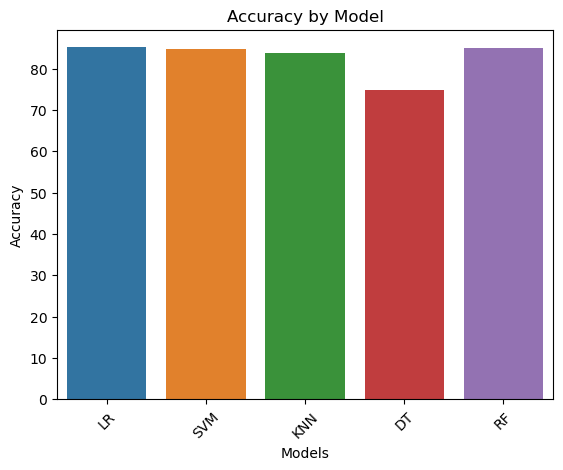

In [72]:
sns.barplot(x='Models', y='ACC', data=final_data)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy by Model')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility if needed
plt.show()

# kaggle

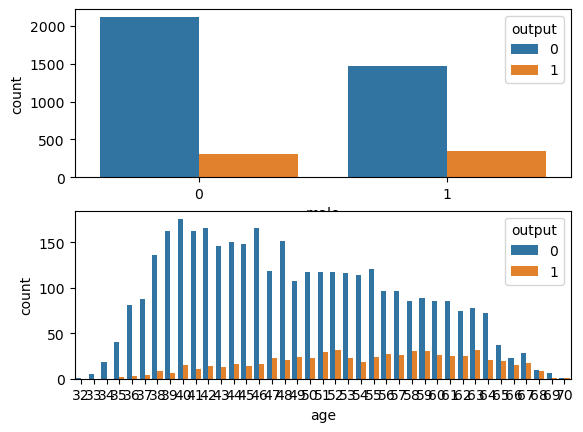

In [73]:
fig, ax = plt.subplots(2)
sns.countplot(x='male',hue='output',data=heart_data, ax=ax[0])
sns.countplot(x='age',hue='output', data=heart_data, ax=ax[1])
plt.show()

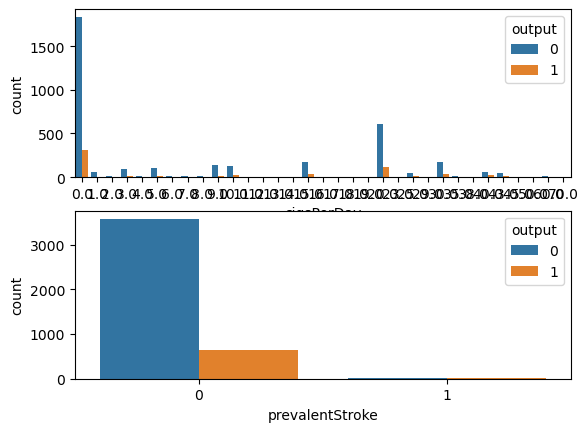

In [74]:
fig, ax = plt.subplots(2)
sns.countplot(x='cigsPerDay',hue='output',data=heart_data, ax=ax[0])
sns.countplot(x='prevalentStroke',hue='output', data=heart_data, ax=ax[1])
plt.show()

In [75]:
from sklearn import metrics

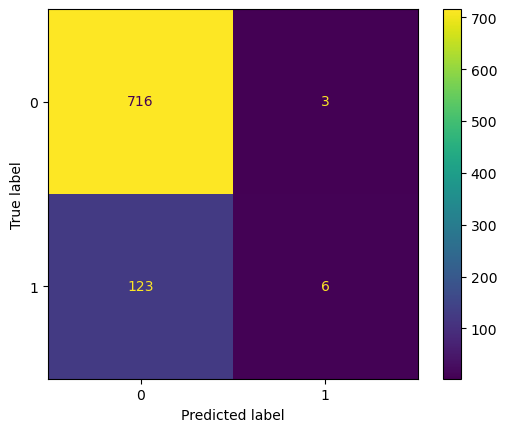

In [76]:
confusion_matrix = metrics.confusion_matrix(Y_test, X_test_prediction)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])
cm_display.plot()
plt.show()

# Saving model

In [77]:
import pickle

In [78]:
filename = "heart_model.sav"
pickle.dump(model, open(filename,'wb'))

In [79]:
loaded_model = pickle.load(open('heart_model.sav','rb'))

(1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0)

In [81]:
input_data = (0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0)

#change input data to a numpy array

input_data_as_numpy_array = np.asarray(input_data)

#reshaping the numpy array as we are predicting for only instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if(prediction[0]==0):
    print("the person does not have heart disease.")
else:
    print("The person has Heart Disease. ")

[0]
the person does not have heart disease.
